## Time Series Problems using LSTMs

### Practical Introduction to Deep Learning - AIMS 2019

***Dr. Emmanuel Dufourq*** www.emmanueldufourq.com

***African Institute for Mathematical Sciences***

***Stellenbosch University***

***2019***



## Imports

In [ ]:
import numpy as np
import tensorflow as tf
import pandas
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math

# Keras imports
from keras.models import Sequential
from keras.layers import Dense

# Here we import the LSTM cell which allows us to make LSTM cells
# Here is the documentation for the LSTM cell in Keras https://keras.io/layers/recurrent/#lstm
from keras.layers import LSTM

%tensorflow_version 1.x
import tensorflow as tf
print(tf.__version__)

1.15.0


Using TensorFlow backend.


In [ ]:
print (tf.__version__)

1.15.0


## Read dataset

In [ ]:
# Read in the data using Pandas
dataframe = pandas.read_csv('http://www.emmanueldufourq.com/carbondata_clean.csv'
                            , engine= 'python', sep=';', header=None)

# Labels the columns manually
dataframe.columns = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']

# Store the dataset into a numpy array
dataset = dataframe.values
dataset = dataset.astype('float32')

### Print the shape of the dataset

In [ ]:
dataset.shape

(53, 12)

### Display the dataset

In [ ]:
dataframe

1       2       3       4  ...       9      10      11      12
0   315.62  316.38  316.71  317.72  ...  313.84  313.26  314.80  315.58
1   316.43  316.97  317.58  319.02  ...  314.16  313.83  315.00  316.19
2   316.93  317.70  318.54  319.48  ...  314.80  315.38  316.10  317.01
3   317.94  318.56  319.68  320.63  ...  316.26  315.42  316.69  317.69
4   318.74  319.08  319.86  321.39  ...  316.21  315.99  317.12  318.31
5   319.57  319.21  319.63  319.41  ...  316.70  316.79  317.79  318.71
6   319.44  320.44  320.89  322.13  ...  317.81  317.30  318.87  319.42
7   320.62  321.59  322.39  323.87  ...  318.64  318.10  319.79  321.08
8   322.07  322.50  323.04  324.42  ...  319.31  319.31  320.72  321.96
9   322.57  323.15  323.89  325.02  ...  320.41  320.25  321.31  322.84
10  324.00  324.42  325.64  326.66  ...  322.38  321.78  322.85  324.11
11  325.03  325.99  326.87  328.13  ...  323.10  323.16  323.98  325.13
12  326.17  326.68  327.18  327.78  ...  323.36  323.57  324.80  326.01
13  326.77  327.63  327.75  329.72  ...  324.93  325.06  326.50  327.55
14  328.54  329.56  330.30  331.50  ...  327.51  327.18  328.16  328.64
15  329.35  330.71  331.48  332.65  ...  327.41  327.21  328.34  329.50
16  330.68  331.41  331.85  333.29  ...  328.57  328.36  329.33  329.60
17  331.66  332.75  333.46  334.78  ...  328.96  328.77  330.18  331.65
18  332.69  333.23  334.97  336.03  ...  331.19  331.21  332.35  333.47
19  335.10  335.26  336.61  337.77  ...  332.33  332.41  333.76  334.83
20  336.21  336.65  338.13  338.95  ...  333.93  334.12  335.26  336.78
21  337.80  338.28  340.04  340.86  ...  336.10  336.05  337.21  338.29
22  339.36  340.51  341.57  342.56  ...  336.92  337.12  338.59  339.90
23  340.92  341.69  342.85  343.92  ...  338.32  338.39  339.48  340.88
24  341.64  342.87  343.59  345.25  ...  340.17  340.30  341.53  343.07
25  344.05  344.77  345.46  345.30  ...  341.35  341.68  343.06  344.54
26  345.25  346.06  347.66  348.20  ...  343.20  343.08  344.40  345.82
27  346.54  347.13  348.05  349.77  ...  345.01  344.47  345.86  347.15
28  348.38  348.70  349.72  351.32  ...  346.52  346.65  347.95  349.18
29  350.38  351.68  352.24  353.66  ...  349.03  349.08  350.15  351.44
30  352.89  353.24  353.80  355.59  ...  350.02  350.29  351.44  352.84
31  353.79  354.88  355.65  356.27  ...  351.28  351.59  353.05  354.27
32  354.87  355.68  357.06  358.51  ...  352.30  352.32  353.79  355.07
33  356.17  356.93  357.82  359.00  ...  352.93  353.31  354.27  355.53
34  356.86  357.27  358.36  359.27  ...  354.10  354.12  355.40  356.84
35  358.22  358.98  359.91  361.32  ...  355.63  356.09  357.56  358.87
36  359.87  360.79  361.77  363.23  ...  358.11  357.97  359.40  360.61
37  362.04  363.17  364.17  364.51  ...  359.60  359.54  360.84  362.18
38  363.04  364.09  364.47  366.25  ...  360.31  360.71  362.44  364.33
39  365.18  365.98  367.13  368.61  ...  364.01  364.35  365.52  367.08
40  368.12  368.98  369.60  370.96  ...  364.94  365.35  366.68  368.04
41  369.25  369.50  370.56  371.82  ...  366.91  366.99  368.33  369.67
42  370.52  371.49  372.53  373.37  ...  368.16  368.42  369.69  371.18
43  372.45  373.14  373.93  375.00  ...  370.66  370.51  372.20  373.71
44  374.87  375.62  376.48  377.74  ...  373.20  373.10  374.64  375.93
45  377.00  377.87  378.73  380.41  ...  374.11  374.44  375.93  377.45
46  378.47  379.76  381.14  382.20  ...  376.66  376.98  378.29  379.92
47  381.35  382.16  382.66  384.73  ...  378.92  379.16  380.18  381.79
48  382.93  383.81  384.56  386.40  ...  380.90  381.14  382.42  383.89
49  385.44  385.73  385.97  387.16  ...  383.09  382.99  384.13  385.56
50  386.93  387.42  388.77  389.46  ...  384.79  384.39  386.00  387.27
51  388.45  389.82  391.08  392.46  ...  386.80  387.18  388.59  389.68
52  391.19  391.76  392.40  393.28  ...  389.00  388.92  390.20  391.80

[53 rows x 12 columns]

## Take a look at the numpy dataset

In [ ]:
dataset.shape

(53, 12)

## Reshape the data into a long vector

In [ ]:
dataset_vector = dataset.reshape(-1,1)

In [ ]:
dataset_vector.shape

(636, 1)

## Plot all the data

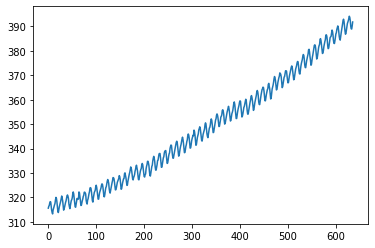

In [ ]:
plt.plot(dataset_vector[0:])
plt.show()

## Take a look at data for 1 year (1959)

In [ ]:
# 12 data points
len(dataset_vector[1:13])

12

In [ ]:
dataset_vector[1:13]

array([[316.38],
       [316.71],
       [317.72],
       [318.29],
       [318.15],
       [316.54],
       [314.8 ],
       [313.84],
       [313.26],
       [314.8 ],
       [315.58],
       [316.43]], dtype=float32)

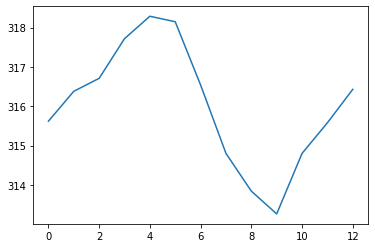

In [ ]:
# Now do the plotting
plt.plot(dataset_vector[0:13])
plt.show()

## Normalise

Normalise the data so that all the values are between 0 and 1. Here we make use of ScikitLearn's MinMaxScaler() function. There are alternatives. Here is a link to various pre-processing steps that you can use: http://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing

In [ ]:
# Take a look at the values before applying the normalisation
dataset_vector[0:5]

array([[315.62],
       [316.38],
       [316.71],
       [317.72],
       [318.29]], dtype=float32)

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset_vector = scaler.fit_transform(dataset_vector)

In [ ]:
# Now look at the values after applying the normalisation (Note: it's always a good idea to print 
# your data often to the screen so you can check what's going on. This way you can easily catch mistakes
# at an early stage).
dataset_vector[0:5]

array([[0.02917171],
       [0.03856611],
       [0.04264498],
       [0.05512977],
       [0.06217551]], dtype=float32)

## Train/test split

In [ ]:
# Define the amount of data that will be used for training. This is a slightly different approach to using Scikit
# learn's built in function train_test_split. Here we are the splitting manually. It might be a good idea to try re
# write this code to use scikit learn's function.
train_size = int(len(dataset_vector) * 0.67)

# Define the amount of data that will be used for testing (total length minus the amount of training data).
test_size = len(dataset_vector) - train_size

# Split the data manually (note that here we are not shuffling the data)
train, test = dataset_vector[0:train_size,:], dataset_vector[train_size:len(dataset_vector),:]

### Create the labels for the dataset

As it stands, the dataset does not have labels (targets) - i.e. the things you want to predict. The dataset just has values of the carbon emission for each month across multiple years. We need to create our predictions manually by shifting the data. 

<b> Note: </b>

The function <i>create_dataset</i> shifts the data in such a way that we can create features and targets. This will make sense in the figures below.

In [ ]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [ ]:
look_back = 1

# Split the data into training features and training targets
trainX, trainY = create_dataset(train, look_back)

# Split the data into testing features and testing targets
testX, testY = create_dataset(test, look_back)

### Print out the shape of the data

Always a good idea to print the shapes to make sure that everything worked well.

In [ ]:
print('Train X shape ',trainX.shape)
print('Train Y shape',trainY.shape)
print('Test X shape ',testX.shape)
print('Test Y shape ',testY.shape)

Train X shape  (424, 1)
Train Y shape (424,)
Test X shape  (208, 1)
Test Y shape  (208,)


## Things will start making sense from here onwards

In [ ]:
dataframe.head()

1       2       3       4  ...       9      10      11      12
0  315.62  316.38  316.71  317.72  ...  313.84  313.26  314.80  315.58
1  316.43  316.97  317.58  319.02  ...  314.16  313.83  315.00  316.19
2  316.93  317.70  318.54  319.48  ...  314.80  315.38  316.10  317.01
3  317.94  318.56  319.68  320.63  ...  316.26  315.42  316.69  317.69
4  318.74  319.08  319.86  321.39  ...  316.21  315.99  317.12  318.31

[5 rows x 12 columns]

### Here is training example 1. 

Double (red) lines shows the 12 training examples, and the single (blue) line shows the 1 test example.

Here of values are not normalised.

<img src="http://www.emmanueldufourq.com/example1.png">

### Here is training example 2. 

Double (red) lines shows the 12 training examples, and the single (blue) line shows the 1 test example.

Here of values are not normalised.

<i> Can you notice how the lines have shifted? This is how we construct training and test data for time-series problems. </i>

<img src="http://www.emmanueldufourq.com/example2.png">

## We can also check this in numpy.

You can verify the first and second training examples to the 14 first points in the vector below.

First take the look at the first 14 points in the normalised dataset. We will reference to this to show you how the training and testing data was constructed.

In [ ]:
dataset_vector[0:14]

array([[0.02917171],
       [0.03856611],
       [0.04264498],
       [0.05512977],
       [0.06217551],
       [0.06044483],
       [0.04054403],
       [0.01903558],
       [0.00716925],
       [0.        ],
       [0.01903558],
       [0.02867723],
       [0.03918409],
       [0.0458591 ]], dtype=float32)

The first training example was the first data point

In [ ]:
trainX[0]

array([0.02917171], dtype=float32)

The test example is actually the 2nd month

In [ ]:
trainY[0]

0.038566113

The second training example is the 2nd month <b>(can you see how we shifted everything by 1 time step) </b>

In [ ]:
trainX[1]

array([0.03856611], dtype=float32)

The second testing example is the 3rd month

In [ ]:
trainY[1]

0.042644978

## Reshape to [samples, timesteps, features]

We need to reshape the data into [samples, timesteps, features] as this is what Keras expects.

Samples denotes each example. (e.g. we have 413 training examples and 197 test examples)

Time steps denotes each time step for each of the points. In our case we have 1 time steps.

It is possible that you have multiple features at each time step. In our dataset we just a single carbon emission feature at each time step hence we use a value of one.

In [ ]:
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

### Check that the numpy reshape function actually did what we wanted.

Here we want [samples, timesteps, features]. And indeed the output for training is (413, 1, 1) whereby we have 413 training samples, 1 time step for each point, and there is only 1 feature per time step.

In [ ]:
print('Train X shape ',trainX.shape)
print('Train Y shape',trainY.shape)
print('Test X shape ',testX.shape)
print('Test Y shape ',testY.shape)

Train X shape  (424, 1, 1)
Train Y shape (424,)
Test X shape  (208, 1, 1)
Test Y shape  (208,)


# Create LSTM model



In [ ]:
# Define the model in Keras
model = Sequential()

### Note

Input shape format (Number of time_steps, number of features)

In [ ]:
# This is how we add an LSTM cell.
model.add((LSTM(units=32, input_shape=(1,1))))

In [ ]:
# We have to add a fully connected layer of the LSTM to output the predictions. Here we only have 1 node because
# our time-series prediction is expecting one output. 
model.add(Dense(1))

In [ ]:
# We define our loss function. Here since we are dealing with numerical data, one option is to use mean squared error.
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])

In [ ]:
# Check the number of parameters. Always a good idea to take a look at the model from Keras' point of view
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 32)                4352      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________


## Train the model

In [ ]:
model.fit(trainX, trainY, epochs=10, batch_size=1, verbose=2, validation_split=0.2)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 339 samples, validate on 85 samples
Epoch 1/10





 - 2s - loss: 0.0110 - mean_squared_error: 0.0110 - val_loss: 0.0296 - val_mean_squared_error: 0.0296
Epoch 2/10
 - 1s - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0027 - val_mean_squared_error: 0.0027
Epoch 3/10
 - 1s - loss: 3.4519e-04 - mean_squared_error: 3.4519e-04 - val_loss: 2.6476e-04 - val_mean_squared_error: 2.6476e-04
Epoch 4/10
 - 1s - loss: 2.3350e-04 - mean_squared_error: 2.3350e-04 - val_loss: 5.5456e-04 - val_mean_squared_error: 5.5456e-04
Epoch 5/10
 - 1s - loss: 2.3462e-04 - mean_squared_error: 2.3462e-04 - val_loss: 2.9452e-04 - val_mean_squared_error: 2.9452e-04
Epoch 6/10
 - 1s - loss: 2.3622e-04 - mean_squared_error: 2.3622e-04 - val_loss: 3.0464e-04 - val_mean_squared_error: 3.0464e-04
Epoch 7/10
 - 1s - loss: 2.5501e-04 - mean_squared_error: 2.5501e-04 - val_loss: 4.6769e-04 - val_mean_squared_

## Predict on the test data and prepare the data for plotting

In [ ]:
# generate predictions for training
trainPredict = model.predict(trainX, batch_size=1)
testPredict = model.predict(testX, batch_size=1)
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset_vector)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset_vector)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset_vector)-1, :] = testPredict

## Plot the predictions and the correct targets

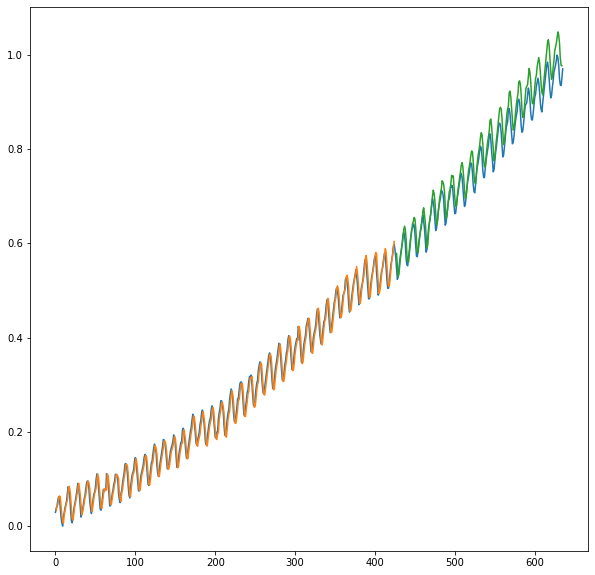

In [ ]:
plt.figure(figsize=(10, 10))
plt.plot(dataset_vector)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

## Prediction

In [ ]:
prediction = model.predict(testX)

## Evaluation

In [ ]:
mean_squared_error(testY, prediction)

0.00095699006

## Task

* Change the look back value from 1 to 2, then from 2 to 4 and finally, 4 to 6. Which value gave you the best performance? When doing so, you will probably need to make a small modification to the network.

<hr>